<a href="https://colab.research.google.com/github/Kangin-Lee/ML_Example/blob/main/linearClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 4.6 MB/s eta 0:00:00


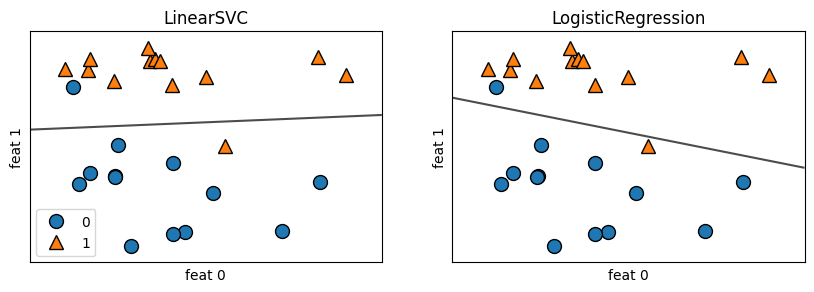

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import QuantileRegressor
import mglearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X,y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1,2,figsize=(10,3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()],axes):
    clf= model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=False,eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("feat 0")
    ax.set_ylabel("feat 1")
axes[0].legend()

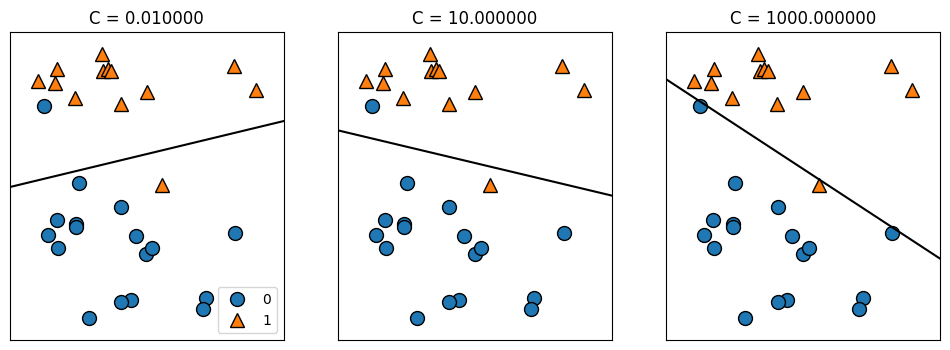

In [4]:
mglearn.plots.plot_linear_svc_regularization()

In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)
print("train set score:{:.3f}".format(logreg.score(X_train, y_train)))
print("test set score:{:.3f}".format(logreg.score(X_test, y_test)))

train set score:0.958
test set score:0.958


In [6]:
logreg100 = LogisticRegression(C=100, max_iter=5000).fit(X_train, y_train)
print("train set score:{:.3f}".format(logreg100.score(X_train, y_train)))
print("train set score:{:.3f}".format(logreg100.score(X_test, y_test)))

train set score:0.981
train set score:0.965


In [7]:
logreg001 = LogisticRegression(C=0.01, max_iter=5000).fit(X_train, y_train)
print("train set score:{:.3f}".format(logreg001.score(X_train, y_train)))
print("train set score:{:.3f}".format(logreg001.score(X_test, y_test)))

train set score:0.953
train set score:0.951


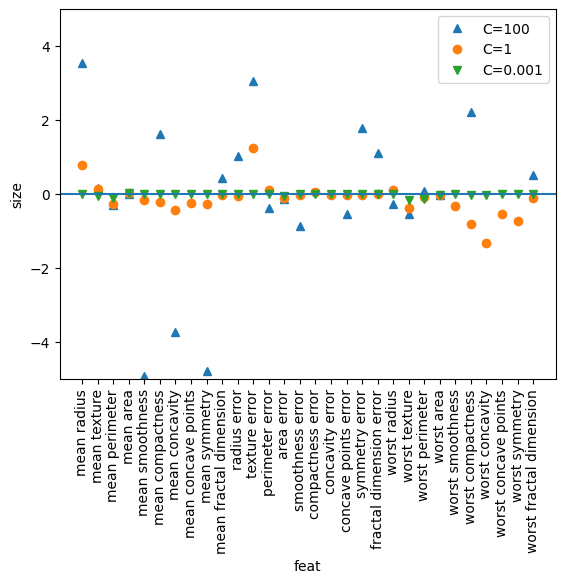

In [8]:
plt.plot(logreg100.coef_.T,"^", label="C=100")
plt.plot(logreg.coef_.T,"o", label="C=1")
plt.plot(logreg001.coef_.T,"v", label="C=0.001")

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims=plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5,5)
plt.xlabel("feat")
plt.ylabel("size")
plt.legend()

C=0.001 li logitic train accep: 0.91
C=0.001 li logitic test accep: 0.92
C=1.000 li logitic train accep: 0.96
C=1.000 li logitic test accep: 0.96
C=100.000 li logitic train accep: 0.99
C=100.000 li logitic test accep: 0.98


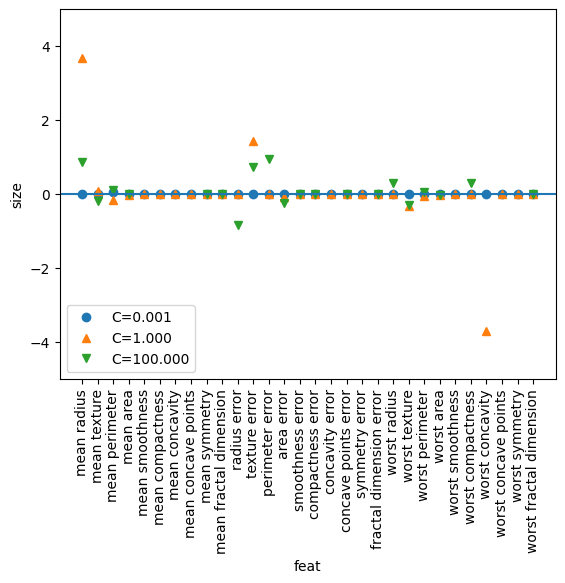

In [9]:
for C, marker in zip([0.001,1,100], ["o","^","v"]):
    lr_l1 = LogisticRegression(solver="liblinear", C=C, penalty="l1", max_iter=1000).fit(X_train, y_train)
    print("C={:.3f} li logitic train accep: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("C={:.3f} li logitic test accep: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker,label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims=plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("feat")
plt.ylabel("size")

plt.ylim(-5,5)
plt.legend(loc=3)

In [10]:
logreg120 = LogisticRegression(C=120, max_iter=5000).fit(X_train, y_train)
print("train set score:{:.3f}".format(logreg120.score(X_train, y_train)))
print("train set score:{:.3f}".format(logreg120.score(X_test, y_test)))

train set score:0.984
train set score:0.965


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


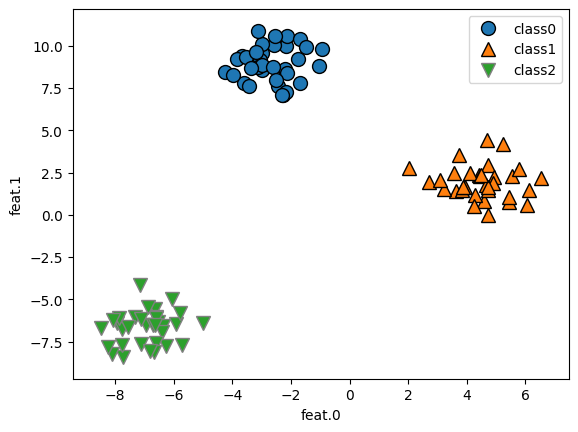

In [11]:
from sklearn.datasets import make_blobs

X,y=make_blobs(random_state =42)
mglearn.discrete_scatter(X[:,0],X[:,1], y)
plt.xlabel("feat.0")
plt.ylabel("feat.1")
plt.legend(["class0","class1","class2"])

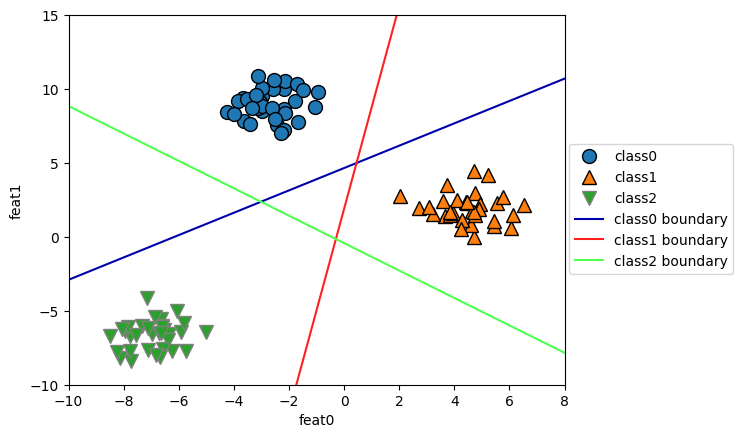

In [12]:
linear_svm = LinearSVC().fit(X,y)
mglearn.discrete_scatter(X[:,0], X[:,1],y)
line = np.linspace(-15,15)
for coef, intercept,color in zip(linear_svm.coef_, linear_svm.intercept_,mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] +intercept)/coef[1], c = color)

plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("feat0")
plt.ylabel("feat1")
plt.legend(["class0","class1", "class2", "class0 boundary", "class1 boundary", "class2 boundary"], loc=(1.01, 0.3))

Text(0, 0.5, 'feat 1')

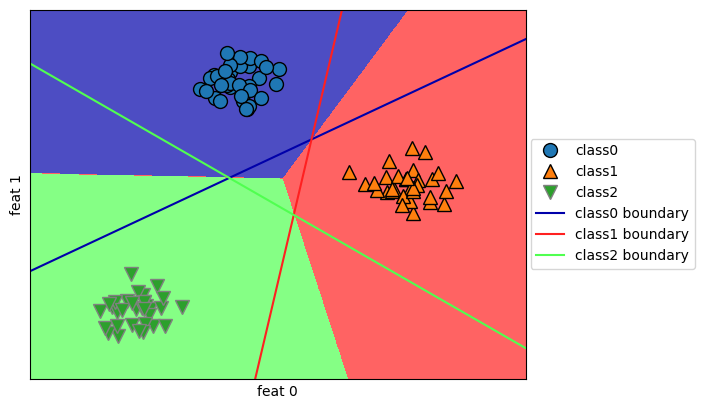

In [13]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill =True, alpha=.7)
mglearn.discrete_scatter(X[:,0],X[:,1], y)
line = np.linspace(-15,15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(["class0","class1", "class2", "class0 boundary", "class1 boundary", "class2 boundary"], loc=(1.01, 0.3))
plt.xlabel("feat 0")
plt.ylabel("feat 1")